In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:

# Load the data
photophobiadata=pd.read_csv('/Users/frankhu/Moxytech/PhotophobiaData/data_decrypt.csv')
print(photophobiadata.shape)
photophobiadata.head()
# print(photophobiadata['Visits'])

(83, 437)


,guid,Visits,time,attack,nrs,Regions,Total_cell,Total_intenisty,Total_coverage,Coverage_percentage,...,PAINS.52,Dermatomes.52,Regions.53,Total_cell.53,Total_intenisty.53,Total_coverage.53,Coverage_percentage.53,Average_intensity.53,PAINS.53,Dermatomes.53
0,ed74ec16-239c-41f9-86ef-2f16a11e7867,screening - 30 day average,2022-08-19T18:58:32.5367450Z,2,5,left_cranium,80,1,1,0.0125,...,NaN,NaN,right_hip,18,0,0,0,NaN,NaN,NaN
1,ed74ec16-239c-41f9-86ef-2f16a11e7867,screening - pre fnirs,2022-08-19T19:00:00.2893090Z,3,5,left_cranium,80,1,1,0.0125,...,NaN,NaN,right_hip,18,0,0,0,NaN,NaN,NaN
2,ed74ec16-239c-41f9-86ef-2f16a11e7867,screening - post fnirs,2022-08-21T02:09:58.2436960Z,4,3,left_cranium,80,0,0,0.0000,...,NaN,NaN,right_hip,18,0,0,0,NaN,NaN,NaN
3,0ac2a709-f9fe-4eb3-990c-44c2b2146070,tdcs pre,2022-08-22T14:49:34.1702050Z,5,2,left_cranium,80,39,13,0.1625,...,NaN,NaN,right_hip,18,0,0,0,NaN,NaN,NaN
4,0ac2a709-f9fe-4eb3-990c-44c2b2146070,tdcs post,2022-08-22T14:57:59.1202960Z,10,2,left_cranium,80,14,7,0.0875,...,NaN,NaN,right_hip,18,0,0,0,NaN,NaN,NaN


In [20]:
# Sort data to pre & post

pretdcs = pd.DataFrame()
posttdcs = pd.DataFrame()

for i in range(0,photophobiadata.shape[0]):
    if '30 day' in str(photophobiadata['Visits'][i]):
       pretdcs=pd.concat([pretdcs,photophobiadata.loc[i:i]],axis =0)
       #print(i)
    elif 'pre' in str(photophobiadata['Visits'][i]):
       pretdcs=pd.concat([pretdcs,photophobiadata.loc[i:i]],axis =0)
       #print(i)
    elif 'post' in str(photophobiadata['Visits'][i]):
       posttdcs=pd.concat([posttdcs,photophobiadata.loc[i:i]],axis =0)
    else:
       pretdcs=pd.concat([pretdcs,photophobiadata.loc[i:i]],axis =0)

#print(pretdcs.shape)
#print(posttdcs.shape)

pretdcs.head()

,guid,Visits,time,attack,nrs,Regions,Total_cell,Total_intenisty,Total_coverage,Coverage_percentage,...,PAINS.52,Dermatomes.52,Regions.53,Total_cell.53,Total_intenisty.53,Total_coverage.53,Coverage_percentage.53,Average_intensity.53,PAINS.53,Dermatomes.53
0,ed74ec16-239c-41f9-86ef-2f16a11e7867,screening - 30 day average,2022-08-19T18:58:32.5367450Z,2,5,left_cranium,80,1,1,0.0125,...,NaN,NaN,right_hip,18,0,0,0,NaN,NaN,NaN
1,ed74ec16-239c-41f9-86ef-2f16a11e7867,screening - pre fnirs,2022-08-19T19:00:00.2893090Z,3,5,left_cranium,80,1,1,0.0125,...,NaN,NaN,right_hip,18,0,0,0,NaN,NaN,NaN
3,0ac2a709-f9fe-4eb3-990c-44c2b2146070,tdcs pre,2022-08-22T14:49:34.1702050Z,5,2,left_cranium,80,39,13,0.1625,...,NaN,NaN,right_hip,18,0,0,0,NaN,NaN,NaN
5,0ac2a709-f9fe-4eb3-990c-44c2b2146070,tdcs pre,2022-08-22T18:09:17.0484970Z,6,3,left_cranium,80,21,7,0.0875,...,NaN,NaN,right_hip,18,0,0,0,NaN,NaN,NaN
7,0ac2a709-f9fe-4eb3-990c-44c2b2146070,tdcs pre,2022-08-22T19:21:13.7608340Z,11,3,left_cranium,80,31,18,0.2250,...,NaN,NaN,right_hip,18,0,0,0,NaN,NaN,NaN


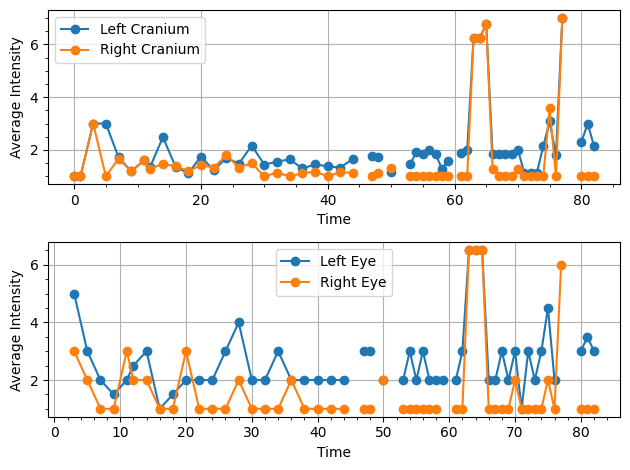

In [21]:

# Plot the data for pre and post
plt.subplot(2,1,1)
ax1=plt.gca()
pretdcs.plot(y=['Average_intensity','Average_intensity.1'],ax=ax1,kind='line',grid=True,marker = 'o',use_index=True)
ax1.legend(["Left Cranium","Right Cranium"])
#plt.xticks(rotation=15)
plt.xlabel('Time')
plt.ylabel('Average Intensity')
plt.tight_layout()
plt.minorticks_on()

plt.subplot(2,1,2)
ax2=plt.gca()
pretdcs.plot(y=['Average_intensity.2','Average_intensity.3'],ax=ax2,kind='line',grid=True,marker = 'o',use_index=True)
ax2.legend(["Left Eye","Right Eye"])
#plt.xticks(rotation=15)
plt.xlabel('Time')
plt.ylabel('Average Intensity')
plt.tight_layout()
plt.minorticks_on()
plt.show()

In [9]:
# Fit a ploy to the data 
def t_plot(x,y):
    
    trend = np.polyfit(x,y,deg=1)
    plt.plot(x,y,'o')
    trendpoly=np.poly1d(trend)
    plt.plot(x,trendpoly(x))
    plt.xlabel('Time')
    plt.ylabel('Average Intensity')

    return trend


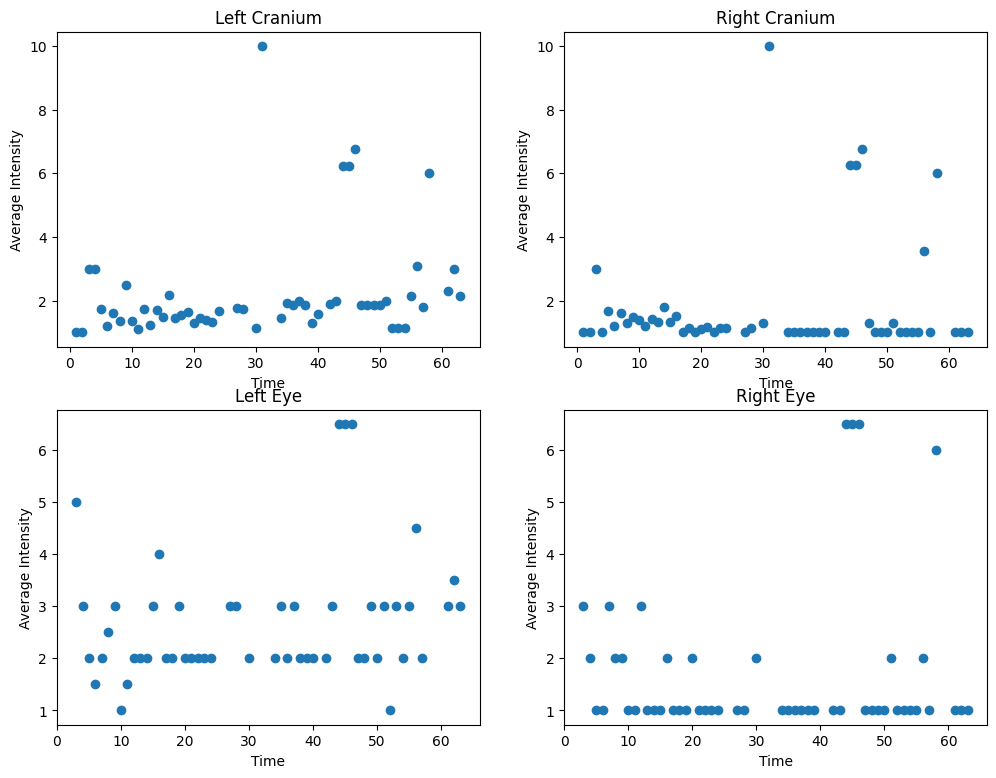

In [10]:
fig=plt.subplots(2, 2, figsize=(12,9))

ax1=plt.subplot(2,2,1)
x = range(1,len(pretdcs)+1)
y = pretdcs['Average_intensity'].to_numpy()
trend1=t_plot(x,y)
ax1.title.set_text('Left Cranium')

ax2=plt.subplot(2,2,2)
x = range(1,len(pretdcs)+1)
y = pretdcs['Average_intensity.1'].to_numpy()
trend2 = t_plot(x,y)
ax2.title.set_text('Right Cranium')


ax3=plt.subplot(2,2,3)
x = range(1,len(pretdcs)+1)
y = pretdcs['Average_intensity.2'].to_numpy()
trend3 = t_plot(x,y)
ax3.title.set_text('Left Eye')

ax4=plt.subplot(2,2,4)
x = range(1,len(pretdcs)+1)
y = pretdcs['Average_intensity.3'].to_numpy()
trend4 = t_plot(x,y)
ax4.title.set_text('Right Eye')

plt.show()

In [11]:
fitting_score = pd.concat([pd.Series(trend1),pd.Series(trend2),pd.Series(trend3),pd.Series(trend4)],axis=1)
fitting_score.index = ['Slope','Intecept']
fitting_score.columns = ['Left Cranium','Right Cranium','Left Eye','Right Eye']
fitting_score

,Left Cranium,Right Cranium,Left Eye,Right Eye
Slope,NaN,NaN,NaN,NaN
Intecept,NaN,NaN,NaN,NaN
